In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression

In [2]:
# Choose some points between

In [3]:
x1 = np.random.randn(1, 100)
x2 = np.random.randn(1, 100)

In [4]:
y = x1**2 + x2**2

In [5]:
y

array([[0.32622268, 0.91707987, 0.16816189, 0.16860556, 2.28391544,
        2.73739338, 3.06616297, 0.00880633, 1.0786003 , 3.76506071,
        0.20518377, 4.80001282, 0.38542768, 0.16209879, 0.31610388,
        1.92964894, 2.47151901, 0.91604351, 2.61007051, 0.50204641,
        2.27199049, 0.38600314, 2.12756923, 5.71324219, 0.18407574,
        2.52124791, 2.06591908, 0.86607325, 0.76193981, 0.65115629,
        0.35776818, 1.20353406, 4.65593753, 5.72685473, 0.58642611,
        1.70204585, 1.53366332, 0.32091169, 3.92842394, 1.52412932,
        1.47023936, 1.28420115, 0.13002124, 1.46938186, 0.21158836,
        0.68900584, 0.2000968 , 0.95834798, 2.71392804, 0.03129433,
        3.69606284, 0.70920848, 2.28274638, 1.11196914, 0.41001904,
        0.81908563, 2.24971939, 4.52379129, 1.7434005 , 0.8459464 ,
        3.53026406, 0.37823054, 0.17147413, 1.33382258, 1.20694106,
        1.81205513, 1.00084739, 0.23097889, 0.26395864, 0.03540729,
        2.91133917, 2.48637784, 0.88356117, 1.05

In [6]:
y[y>1] = 1
y[y<1] = 0

Text(0, 0.5, 'x2')

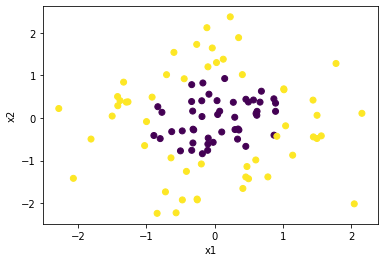

In [7]:
plt.scatter(x1, x2, c=y)
plt.xlabel("x1")
plt.ylabel("x2")

In [8]:
new_x = np.zeros((4, 100))


In [9]:
new_x[0] = x1
new_x[1] = x2
new_x[2] = x1**2
new_x[3] = x2**2

In [10]:
clf = LogisticRegression(penalty='none',solver='newton-cg')

In [11]:
clf.fit(new_x.T, y.T)

/home/nipunbatra-pc/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='none',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [12]:
clf.coef_

array([[1.99686074e-01, 9.26413861e-01, 3.13708042e+02, 2.95414347e+02]])

In [13]:
new_x.T[:, 0]

array([-0.02152551,  0.89139663,  0.03521442, -0.31584798,  1.44473888,
       -0.59568086, -0.26238616,  0.04411439, -0.91487973, -0.2538639 ,
        0.35525883,  1.77598442,  0.61742051,  0.29796561, -0.47389299,
        0.12603678,  1.49667375,  0.86839115,  1.56025842,  0.56779303,
       -1.42015839,  0.49396737,  0.45581095,  0.22865153,  0.34301862,
        0.77877036,  1.1417023 ,  0.68418248, -0.831222  ,  0.45599555,
        0.33520064, -0.19479438,  2.15490611, -0.84143671, -0.10206956,
        0.02727654, -0.70355992, -0.08324679, -0.47246474,  0.47288451,
        1.01403117, -0.6384836 , -0.32142661, -1.02444584,  0.27321489,
       -0.33530542, -0.18826988, -0.88874168, -0.03472593,  0.07379008,
        0.35063221, -0.17197891,  0.49596613,  1.03853775,  0.62073188,
        0.89123671, -1.49918554, -0.11327584, -0.41290237, -0.50007086,
       -0.71971866,  0.60586739, -0.30599312,  0.60186875,  0.40531931,
       -1.29307494, -0.99695299, -0.0940624 , -0.33665066, -0.18

In [14]:
X = np.vstack((x1, x2)).T
X.shape

(100, 2)

Text(0, 0.5, 'x2')

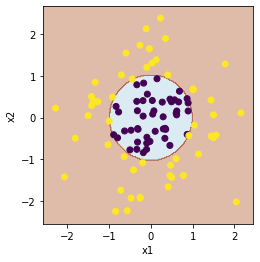

In [15]:
# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 0.3, X[:, 0].max() + 0.3
y_min, y_max = X[:, 1].min() - 0.3, X[:, 1].max() + 0.3
h = 0.02
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))





Z = clf.predict(np.c_[xx.ravel(), yy.ravel(), np.square(xx.ravel()), np.square(yy.ravel())])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.4)
plt.gca().set_aspect('equal')
plt.scatter(x1, x2, c=y)
plt.xlabel("x1")
plt.ylabel("x2")

In [16]:
Z.shape

(261, 252)

In [17]:
np.c_[xx.ravel(), yy.ravel(), np.square(xx.ravel()), np.square(yy.ravel())]

array([[-2.58036499, -2.54027654,  6.6582835 ,  6.45300491],
       [-2.56036499, -2.54027654,  6.5554689 ,  6.45300491],
       [-2.54036499, -2.54027654,  6.4534543 ,  6.45300491],
       ...,
       [ 2.39963501,  2.65972346,  5.75824817,  7.07412887],
       [ 2.41963501,  2.65972346,  5.85463357,  7.07412887],
       [ 2.43963501,  2.65972346,  5.95181897,  7.07412887]])

In [18]:
xx.ravel()

array([-2.58036499, -2.56036499, -2.54036499, ...,  2.39963501,
        2.41963501,  2.43963501])

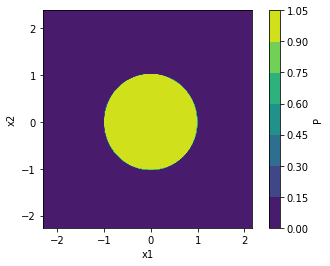

In [19]:
# create a mesh to plot in
x_min, x_max = X[:, 0].min() - h, X[:, 0].max() + h
y_min, y_max = X[:, 1].min() - h, X[:, 1].max() + h
h = 0.02
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))





Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel(), np.square(xx.ravel()), np.square(yy.ravel())])
# Put the result into a color plot
Z = Z[:, 0].reshape(xx.shape)
plt.contourf(xx, yy, Z,)
plt.gca().set_aspect('equal')
#plt.scatter(x1, x2, c=y)
plt.xlabel("x1")
plt.ylabel("x2")
plt.colorbar(label='P')


ValueError: cannot reshape array of size 272 into shape (272,292)

In [96]:
Z.shape

(79424, 2)

In [92]:
xx.shape

(272, 292)

In [94]:
Z.size

79424

In [99]:
Z[:, 0]

array([0., 0., 0., ..., 0., 0., 0.])